In [ ]:
import pandas as pd

# Read the data from the text file
file_path = 'higgs-activity_time.txt'  # Replace with the actual path to your file
columns = ['UserA', 'UserB', 'Timestamp', 'Interaction']

df = pd.read_csv(file_path, delimiter=' ', header=None, names=columns)

# Display the first few rows of the dataframe
df

,UserA,UserB,Timestamp,Interaction
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
2,376989,50329,1341101181,RT
3,26375,168366,1341101183,MT
4,376989,13813,1341101192,RT
...,...,...,...,...
563064,97296,15483,1341705530,RE
563065,19979,49694,1341705552,MT
563066,19979,80429,1341705552,MT
563067,178085,1062,1341705574,RT


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you've already read the data into a DataFrame df

# Create a directed graph
G = nx.DiGraph()

# Add nodes from 'UserA' and 'UserB' columns
G.add_nodes_from(df['UserA'])
G.add_nodes_from(df['UserB'])

# Add edges based on interactions
for index, row in df.iterrows():
    user_a = row['UserA']
    user_b = row['UserB']
    interaction = row['Interaction']

    # Depending on the interaction type, add edges
    if interaction == 'RT' or interaction == 'MT' or interaction == 'RE':
        G.add_edge(user_a, user_b, interaction=interaction)


In [ ]:
G.number_of_nodes(), G.number_of_edges()

(304691, 466545)

Propagation graph creation

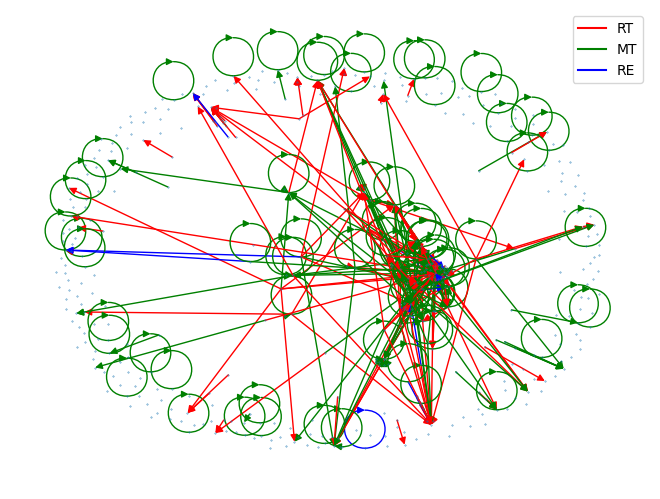

In [ ]:

# Sample 500 nodes
sampled_nodes = set(pd.concat([df['UserA'], df['UserB']]).sample(500))

# Create a subgraph with sampled nodes
subgraph = G.subgraph(sampled_nodes)

# Draw the subgraph with different edge colors based on interaction types
edge_colors = {'RT': 'red', 'MT': 'green', 'RE': 'blue'}

edge_colors_list = [edge_colors.get(G[u][v]['interaction'], 'black') for u, v in subgraph.edges()]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=False, font_weight='bold', edge_color=edge_colors_list, node_size=0.1)

# Add a legend
for interaction_type, color in edge_colors.items():
    plt.plot([], [], color=color, label=interaction_type)

plt.legend()
plt.show()

Linear Threshold model

In [ ]:
import networkx as nx
import random


# Linear Threshold model function : takes a graph and seed nodes and returns activated nodes
def linear_threshold_model(graph, seed_nodes, max_iterations=1000):
    activated_nodes = set(seed_nodes)
    new_nodes_activated = True
    iteration = 0

    while new_nodes_activated and iteration < max_iterations:
        new_nodes_activated = False
        for node in graph.nodes():
            if node not in activated_nodes:
                neighbors = set(graph.predecessors(node))  # Incoming neighbors
                activated_neighbors = neighbors.intersection(activated_nodes)
                weights_sum = sum(graph[neighbor][node]['weight'] for neighbor in activated_neighbors)

                if weights_sum >= graph.nodes[node]['threshold']:
                    activated_nodes.add(node)
                    new_nodes_activated = True

        iteration += 1

    return activated_nodes



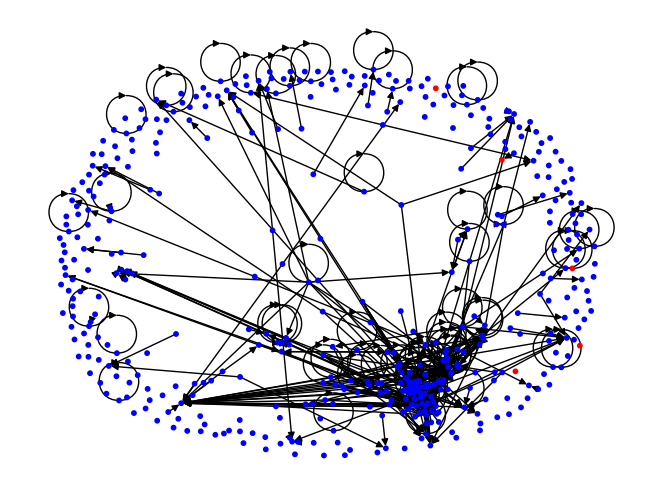

In [ ]:
# Linear threshold model with random weights and threshold.

# Assuming your graph has edge weights and node thresholds stored as attributes
# Add attributes to the graph (replace 'weight' and 'threshold' with your actual attribute names)
for edge in subgraph.edges():
    subgraph[edge[0]][edge[1]]['weight'] = random.random()  # Assign random weights

for node in subgraph.nodes():
    subgraph.nodes[node]['threshold'] = random.random()  # Assign random thresholds

# Seed nodes (replace with your actual seed nodes)
seeds = [random.choice(list(subgraph.nodes)) for _ in range(5)]

# Run Linear Threshold Model
activated_nodes = linear_threshold_model(subgraph, seeds)

# Visualize the result
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=False, font_weight='bold', node_size=10, node_color=['red' if node in activated_nodes else 'blue' for node in subgraph.nodes()])
plt.show()


In [ ]:
print(df)

         UserA   UserB   Timestamp Interaction                 TimestampDate
0       223789  213163  1341100972          MT 1970-01-01 00:00:01.341100972
1       223789  213163  1341100972          RE 1970-01-01 00:00:01.341100972
2       376989   50329  1341101181          RT 1970-01-01 00:00:01.341101181
3        26375  168366  1341101183          MT 1970-01-01 00:00:01.341101183
4       376989   13813  1341101192          RT 1970-01-01 00:00:01.341101192
...        ...     ...         ...         ...                           ...
563064   97296   15483  1341705530          RE 1970-01-01 00:00:01.341705530
563065   19979   49694  1341705552          MT 1970-01-01 00:00:01.341705552
563066   19979   80429  1341705552          MT 1970-01-01 00:00:01.341705552
563067  178085    1062  1341705574          RT 1970-01-01 00:00:01.341705574
563068   23996     253  1341705593          RT 1970-01-01 00:00:01.341705593

[563069 rows x 5 columns]


In [ ]:
# Create a DataFrame for the nodes in subgraph2
subgraph_nodes = list(subgraph2.nodes)
subgraph_nodes_df = pd.DataFrame({'User': subgraph_nodes})

# Merge subgraph_nodes_df with df to get the corresponding rows from the original DataFrame
result_df = pd.merge(subgraph_nodes_df, df, left_on='User', right_on='UserA', how='inner')

# Display the resulting DataFrame
result_df

,User,UserA,UserB,Timestamp,Interaction
0,4,4,88,1341155676,MT
1,4,4,26486,1341155676,RT
2,4,4,38960,1341377803,RT
3,4,4,349,1341379633,RT
4,4,4,3604,1341379633,MT
...,...,...,...,...,...
11430,18431,18431,88,1341583253,RT
11431,18431,18431,64911,1341583253,MT
11432,18431,18431,52087,1341583253,MT
11433,18431,18431,3629,1341671024,MT


Creation of propagation graphs for different actions


In [ ]:
# Dictionary to store propagation graphs for each action type
propagation_graphs = {}

# Convert 'Timestamp' column to datetime format
result_df['TimestampDate'] = pd.to_datetime(result_df['Timestamp'])

# Iterate over unique action types
for action_type in result_df['Interaction'].unique():
    # Create a directed graph for propagation for each action type
    propagation_graph = nx.DiGraph()

    # Add nodes and edges based on propagation conditions
    for index, row in result_df[result_df['Interaction'] == action_type].iterrows():
        vi = row['UserA']
        vj = row['UserB']
        ti = row['TimestampDate']

        if subgraph2.has_edge(vi, vj):
            # Check if there's a previous action (vi, a, ti) and (vj, a, tj)
            # prev_actions_vi = [(u, td) for u, a, t, td in df[(df['UserA'] == vi) & (df['Interaction'] == action_type) & (df['TimestampDate'] < ti)].itertuples(index=False)]
            prev_actions_vj = [(u, td) for u1, u, a, t, inter, td in result_df[(result_df['UserB'] == vj) & (result_df['Interaction'] == action_type) & (result_df['TimestampDate'] > ti)].itertuples(index=False)]
            # print(prev_actions_vj)
            if prev_actions_vj:
                # Check the condition (iii) T(vi, vj) <= ti
                # T_vi_vj = min(ti - t for _, t in prev_actions_vi)
                # Add an edge to the propagation graph
                delta_t = ti - min(t for _, t in prev_actions_vj)
                propagation_graph.add_edge(vi, vj, prop=delta_t)

    # Store the propagation graph for the current action type
    propagation_graphs[action_type] = propagation_graph
    print(propagation_graph.number_of_nodes(), propagation_graph.number_of_edges())

472 1785
414 1319
128 159


In [ ]:
propagation_graphs['RT'].number_of_nodes(), propagation_graphs['RT'].number_of_edges()

(414, 1319)

In [ ]:
propagation_graphs

{'MT': <networkx.classes.digraph.DiGraph at 0x7d61b7a61810>,
 'RT': <networkx.classes.digraph.DiGraph at 0x7d6193ed20b0>,
 'RE': <networkx.classes.digraph.DiGraph at 0x7d61b7a601c0>}

In [ ]:
dx = df.head(5000)

In [ ]:
dx

,UserA,UserB,Timestamp,Interaction,TimestampDate
0,223789,213163,1341100972,MT,1970-01-01 00:00:01.341100972
1,223789,213163,1341100972,RE,1970-01-01 00:00:01.341100972
2,376989,50329,1341101181,RT,1970-01-01 00:00:01.341101181
3,26375,168366,1341101183,MT,1970-01-01 00:00:01.341101183
4,376989,13813,1341101192,RT,1970-01-01 00:00:01.341101192
...,...,...,...,...,...
4995,339219,63931,1341205002,RT,1970-01-01 00:00:01.341205002
4996,179712,6940,1341205030,RT,1970-01-01 00:00:01.341205030
4997,75309,1134,1341205043,RT,1970-01-01 00:00:01.341205043
4998,360026,250519,1341205067,RT,1970-01-01 00:00:01.341205067


Propagation graph creation


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you've already read the data into a DataFrame df

# Create a directed graph
G = nx.DiGraph()

# Add nodes from 'UserA' and 'UserB' columns
G.add_nodes_from(dx['UserA'])
G.add_nodes_from(dx['UserB'])

# Add edges based on interactions
for index, row in dx.iterrows():
    user_a = row['UserA']
    user_b = row['UserB']
    interaction = row['Interaction']

    # Depending on the interaction type, add edges
    if interaction == 'RT' or interaction == 'MT' or interaction == 'RE':
        G.add_edge(user_a, user_b, interaction=interaction)



In [ ]:
G.number_of_nodes(), G.number_of_edges()

(3825, 4476)

Probability Calculation

In [ ]:
import numpy as np

# Get the list of nodes in the first propagation graph (assuming they are the same for all graphs)
nodes_list = list(subgraph2.nodes())

# Initialize a matrix to store probabilities
probability_matrix = np.zeros((len(nodes_list), len(nodes_list)))

# Iterate over propagation graphs
for action in propagation_graphs:
    # Iterate over nodes to calculate probabilities
    print(propagation_graphs[action])
    propagation_graph = propagation_graphs[action]
    for i, node_v in enumerate(nodes_list):
        for j, node_u in enumerate(nodes_list):
            if i != j:  # Exclude self-loops
                # Calculate the number of actions influenced from node v to node u
                if propagation_graph.has_node(node_v):
                    if node_u in propagation_graph.successors(node_v) :
                        Av2u = 1
                        # Calculate the total number of actions performed by node v
                        Av = propagation_graph.out_degree(node_v)
                        # Add up the probabilities from each graph
                        probability_matrix[i, j] += (Av2u / Av) if Av > 0 else 0

# Display the combined probability matrix
print("Combined Probability Matrix:")
print(probability_matrix)

DiGraph with 472 nodes and 1785 edges
DiGraph with 414 nodes and 1319 edges
DiGraph with 128 nodes and 159 edges
Combined Probability Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
np.unique(probability_matrix)

array([0.        , 0.01075269, 0.02083333, 0.025     , 0.03703704,
       0.04545455, 0.04761905, 0.05      , 0.05263158, 0.05555556,
       0.05882353, 0.0625    , 0.06666667, 0.07142857, 0.07692308,
       0.08333333, 0.09090909, 0.09953704, 0.1       , 0.10263158,
       0.1037037 , 0.10846561, 0.11111111, 0.1125    , 0.11437908,
       0.11688312, 0.125     , 0.12916667, 0.13095238, 0.13194444,
       0.13574661, 0.13809524, 0.14090909, 0.14285714, 0.14761905,
       0.15      , 0.15384615, 0.16233766, 0.16666667, 0.16783217,
       0.16785714, 0.17261905, 0.17777778, 0.1875    , 0.18803419,
       0.19444444, 0.1984127 , 0.2       , 0.20168067, 0.20192308,
       0.20833333, 0.20952381, 0.21075269, 0.21590909, 0.225     ,
       0.22619048, 0.23333333, 0.23376623, 0.23703704, 0.24358974,
       0.25      , 0.25396825, 0.25757576, 0.25882353, 0.26666667,
       0.26785714, 0.27142857, 0.27777778, 0.28703704, 0.29090909,
       0.29166667, 0.29583333, 0.3       , 0.3       , 0.30263

Linear Threshold Model with propagation probability

In [ ]:
import networkx as nx
import random
import numpy as np

def linear_threshold_model_with_probabilities(probability_matrix, seed_nodes, max_iterations=1000):
    num_nodes = len(probability_matrix)
    activated_nodes = set(seed_nodes)
    new_nodes_activated = True
    iteration = 0

    while new_nodes_activated and iteration < max_iterations:
        new_nodes_activated = False
        for node in range(num_nodes):
            if node not in activated_nodes:
                # Get the incoming neighbors of the node
                neighbors = [i for i in range(num_nodes) if probability_matrix[i, node] > 0]

                # Calculate the sum of probabilities from activated neighbors
                weights_sum = sum(probability_matrix[neighbor, node] for neighbor in neighbors if neighbor in activated_nodes)

                # Compare the sum with the threshold
                if weights_sum >= node['threshold']:  # Assuming random.random() generates a number between 0 and 1
                    activated_nodes.add(node)
                    new_nodes_activated = True

        iteration += 1

    return activated_nodes


LTM with probability matrix


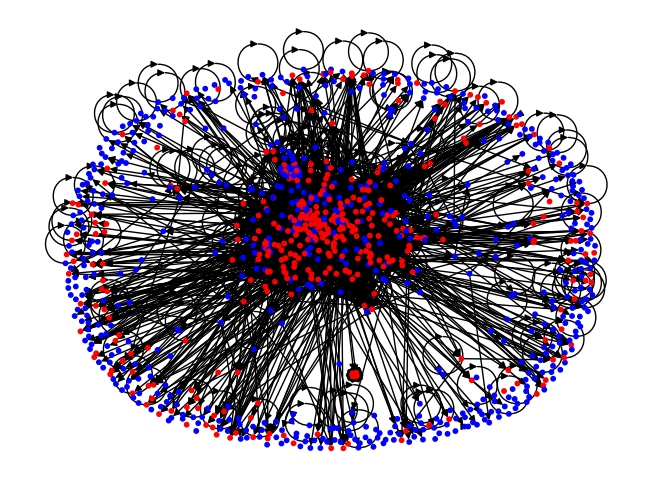

In [ ]:
# Linear threshold model

for node in subgraph2.nodes():
    subgraph2.nodes[node]['threshold'] = random.random()  # Assign random thresholds

# Seed nodes (replace with your actual seed nodes)
seeds = [random.choice(list(subgraph2.nodes)) for _ in range(100)]

# Run Linear Threshold Model
activated_nodes = linear_threshold_model(probability_matrix, seeds)

# Visualize the result
pos = nx.spring_layout(subgraph2)
nx.draw(subgraph2, pos, with_labels=False, font_weight='bold', node_size=10, node_color=['red' if node in activated_nodes else 'blue' for node in subgraph2.nodes()])
plt.show()
